In [1]:
# Use the octogonal 3-5-5-5-3 kernel.

# Use use the "L" shaped kernel (same as the text book) to detect the upper-right corner for hit-and-miss transform.

# Write programs which do gray scale morphological dilation, erosion, opening, and closing on a gray scale image.

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
#用 pyplot 使 Img 顯示在 jupyter notebook 中
def imshow(img):
    plt.imshow(img, cmap='Greys_r',vmin = 0, vmax = 255)
    plt.show()
#Binarize Lena withdef imshow(img):
    plt.imshow(img[:,:,::-1])#因為 plt 與 cv 一個是 RGB 另一個是 BGR the threshold 128
img2 = img.copy()
for i in range(len(img)):
    for j in range(len(img[0])):
        if img2[i][j] >= 128:
            img2[i][j] = 255
        else:
            img2[i][j] = 0
imshow(img2)

<Figure size 640x480 with 1 Axes>

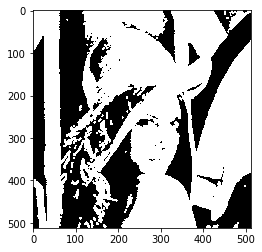

In [2]:
kernel = np.ones((5,5), np.uint8) 
kernel[0][0] = kernel[0][4] = kernel[4][0] = kernel[4][4] = 0

def dilate(img, kernel):
    img_dilation = np.zeros([len(img),len(img[0])],dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] == 255:
                for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                    for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                            if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                                img_dilation[k][l] = 255
    return img_dilation
img_dilation = dilate(img2, kernel)
cv2.imwrite('Dilation.png', img_dilation)
imshow(img_dilation)

In [3]:
if (img_dilation == cv2.dilate(img2, kernel)).all():
    print("correct")
else:
    print("Wrong")

correct


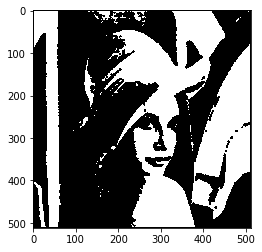

In [4]:
def erosion(img, kernel):
    img_erosion = np.zeros([len(img),len(img[0])],dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            fit = 1
            for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                    if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                        if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1 and img[k][l] != 255:
                            fit = 0
                    elif kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                        fit = 0
            if fit == 1:
                img_erosion[i][j] = 255
            else:
                img_erosion[i][j] = 0
    return img_erosion
img_erosion = erosion(img2, kernel)
cv2.imwrite('Erosion.png', img_erosion)
imshow(img_erosion)

In [5]:
img_erosion_cv = cv2.erode(img2, kernel)
if (img_erosion == img_erosion_cv).all():
    print("correct!")
else:
    print("False")
count = 0
for i in range(512):
    for j in range(512):
        if not(img_erosion[i][j] == img_erosion_cv[i][j]).all():
            count += 1
print(count)

False
1725


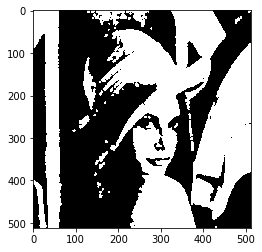

In [6]:
def opening(img, kernel):
    img_opening = erosion(img, kernel)
    img_opening = dilate(img_opening, kernel)
    return img_opening
img_opening = opening(img2, kernel)
cv2.imwrite('Opening.png', img_opening)
imshow(img_opening)

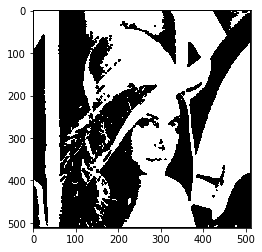

In [7]:
def closing(img, kernel):
    img_closing = dilate(img, kernel)
    img_closing = erosion(img_closing, kernel)
    return img_closing
img_closing = closing(img2, kernel)
cv2.imwrite('Closing.png', img_closing)
imshow(img_closing)

[[0 1 1]
 [0 0 1]
 [0 0 0]]
[[0 0 0]
 [1 1 0]
 [0 1 0]]


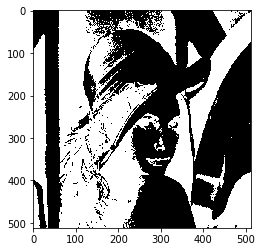

In [8]:
kernel_k = np.zeros((3,3), np.uint8)
kernel_k[0][1] = kernel_k[0][2] = kernel_k[1][2] = 1
print(kernel_k)
kernel_j = np.zeros((3,3), np.uint8)
kernel_j[1][0] = kernel_j[1][1] = kernel_j[2][1] = 1
print(kernel_j)
img2_c = img2.copy()
for i in range(len(img2)):
    for j in range(len(img2[0])):
        if img2[i][j] == 255:
            img2_c[i][j] = 0
        else:
            img2_c[i][j] = 255
imshow(img2_c)

In [9]:
h_img = erosion(img2, kernel_j)
h_img_c = erosion(img2_c, kernel_k)
h_and_m = np.zeros([len(img2),len(img2[0])],dtype=np.uint8)
for i in range(len(h_img_c)):
    for j in range(len(h_img_c[0])):
        if h_img_c[i][j] == h_img[i][j]:
            h_and_m[i][j] = h_img[i][j]
cv2.imwrite('Hit-and-Miss.png', h_and_m)

True

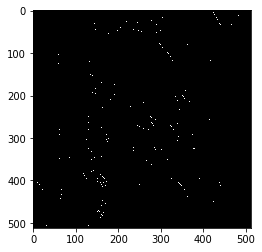

In [10]:
plt.imshow(h_and_m, cmap='gray')#??????? why is this different from what cv2.imshow('Hit-and-Miss.png',h_and_m) shows

In [11]:
'''
cv2.imshow('Hit-and-Miss.png',h_and_m)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('Hit-and-Miss.png',h_and_m)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"